In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.ndimage import gaussian_filter1d

Kd = 100 / np.tan(-5 * np.pi / 180)

In [3]:
def compute_depth(x, z, D0, K):
    slope = np.gradient(z, x)
    NS = len(x)

    d = np.zeros(NS)

    for i in range(0, NS):
        t = (x[i:] - x[i]) / K
        G = np.exp(-t ** 2)
        d[i] = np.sum(slope[i:]*G)/np.sum(G)
        
    return d * Kd

def compute_depth_(x, z, D0, K):
    slope = np.gradient(z, x)
    return gaussian_filter1d(slope, sigma = K) * Kd
        

1.0


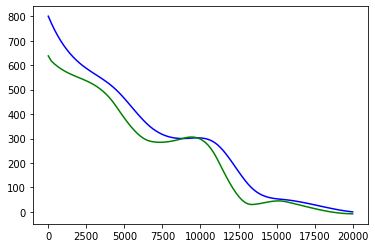

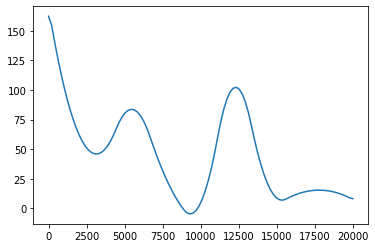

556.5555555555555


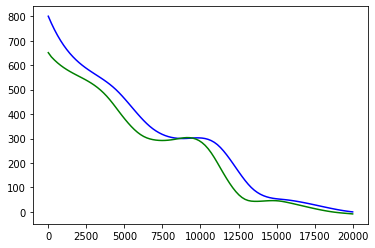

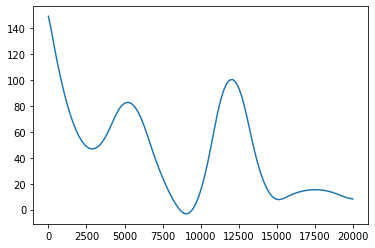

1112.111111111111


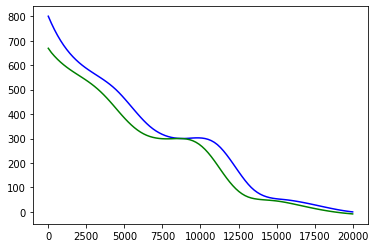

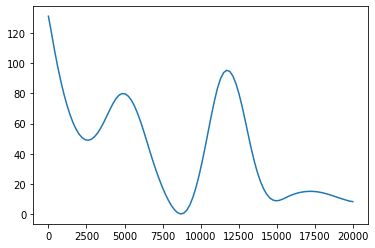

1667.6666666666665


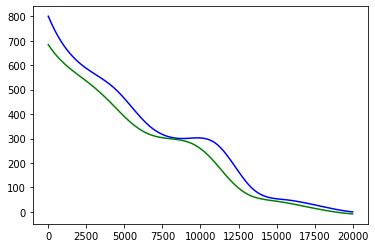

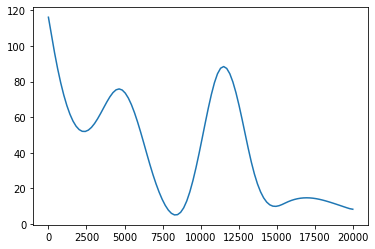

2223.222222222222


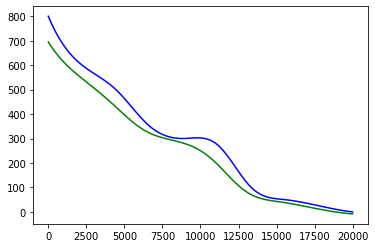

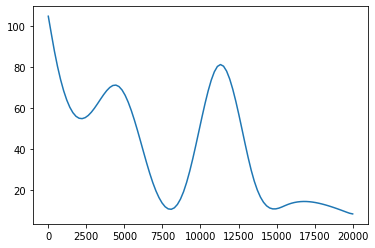

2778.777777777778


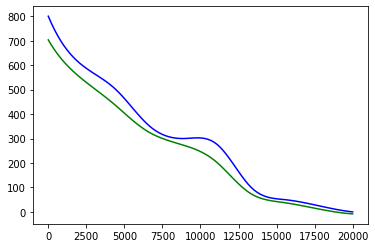

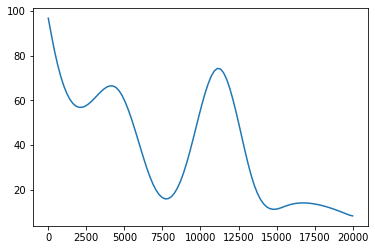

3334.333333333333


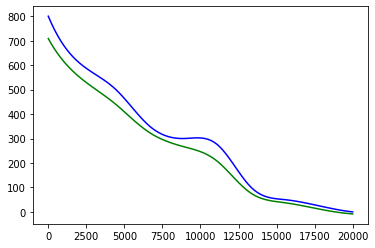

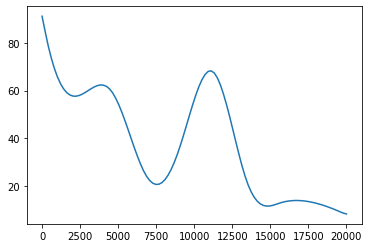

3889.8888888888887


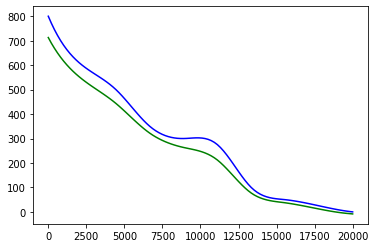

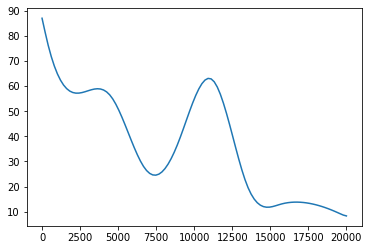

4445.444444444444


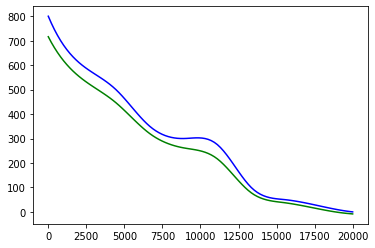

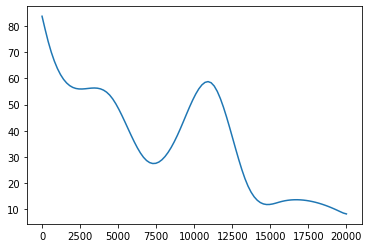

5001.0


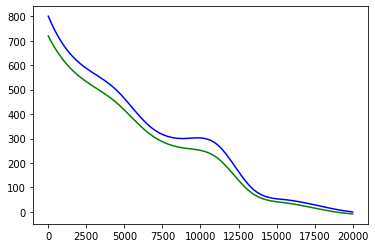

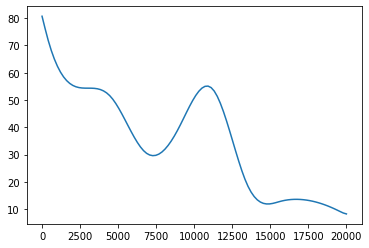

In [5]:
L = 20000
x_ = np.linspace(0, L, 10)
z_ = [800, 600, 500, 350, 300, 275, 100, 50, 25, 0]

x = np.linspace(0, L, 100)
z = interp1d(x_, z_, kind='cubic')(x)

for K in list(x_ / 4 + 1):
    print(K)
    d = compute_depth(x,z, 100, K)
    plt.plot(x, z, 'b', x, z - d, 'g')
    plt.show()
    plt.plot(x, d)
    plt.show()
    

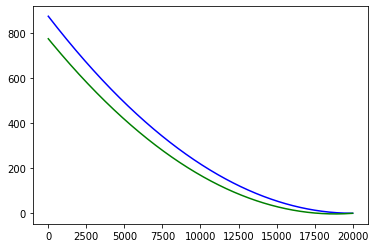

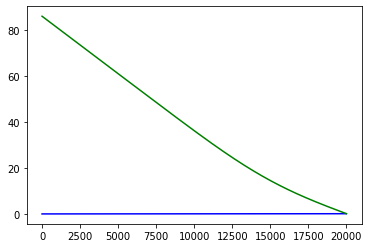

In [6]:
L = 20000
x = np.linspace(0, L, 1000)
z = np.tan(5.0 * np.pi / 180) / (2 * L) * (x ** 2 + L * ( L - 2 * x ) )


d = compute_depth(x,z, 100, 2.25)
plt.plot(x, z, 'b', x, z - d, 'g')
plt.show()
plt.plot(x, np.gradient(z, x), 'b', x, compute_depth(x,z, -0.085, 5000), 'g')
plt.show()

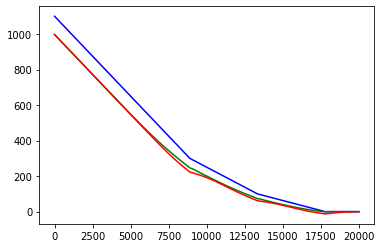

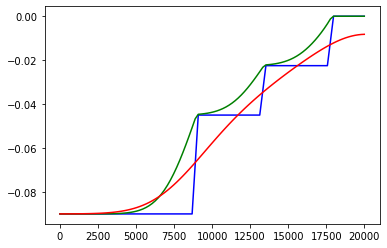

In [10]:
x_ = np.linspace(0, L, 10)
z_ = [1100, 900, 700, 500, 300, 200, 100, 50, 0, 0]

x = np.linspace(0, L, 100)
z = interp1d(x_, z_)(x)

d = compute_depth(x,z, 1, 2500)

slope = np.gradient(z, x)
gd = gaussian_filter1d(slope, sigma = 5)

plt.plot(x, z, 'b', x, z - d, 'g', x, z - gd*Kd, 'r')
plt.show()
plt.plot(x, slope, 'b', x, d / Kd, 'g', x, gaussian_filter1d(np.gradient(z, x), sigma = 2500 / (L / 100) ), 'r')
plt.show()

